In [1]:

import pickle
from typing import List

import matplotlib.pyplot as plt

from graph import Graph

with open('data/graphs.dat', 'rb') as file:
    train_graphs: List[Graph] = pickle.load(file)


In [2]:
sum(g.is_connected() and not g.is_cyclic() for g in train_graphs) / len(train_graphs)

1.0

In [3]:

graphs_with_family_id_overlap = []
for g in train_graphs:
    family_to_part_id = {}
    for p in g.get_parts():
        part_id = p.get_part_id()
        family_id = p.get_family_id()
        previous_part_id = family_to_part_id.get(family_id)
        if previous_part_id is None:
            family_to_part_id[family_id] = part_id
        elif previous_part_id != part_id:
            graphs_with_family_id_overlap.append(g)
            break

len(graphs_with_family_id_overlap) / len(train_graphs)

0.14418854736087464

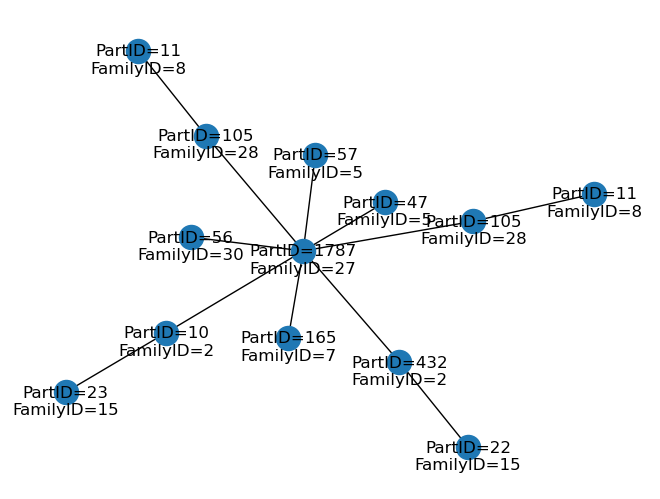

In [4]:
graphs_with_family_id_overlap[4].draw()

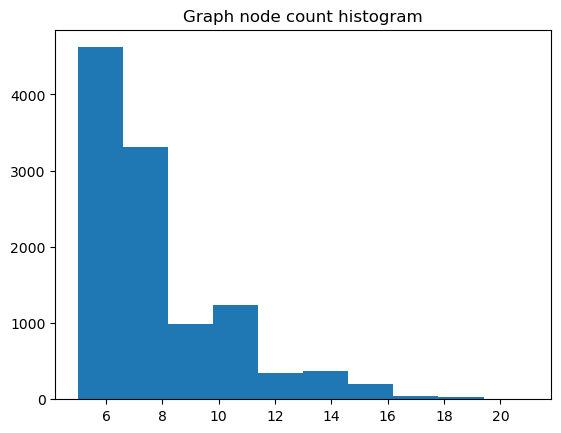

In [5]:
a = [len(g.get_nodes()) for g in train_graphs]
_ = plt.hist(a)  # arguments are passed to np.histogram
plt.title("Graph node count histogram")
plt.show()
# sum(len(g.get_nodes()) >= 17 for g in train_graphs) / len(train_graphs)

In [6]:
from unique_part import get_unique_parts

part_set = set()
for g in train_graphs:
    part_set.update(get_unique_parts(g))

part_list = list(part_set)
part_list.sort()
len(part_list)


1091

In [7]:

family_id_set = set()
for g in train_graphs:
    for n in g.get_nodes():
        family_id_set.add(n.get_part().get_family_id())

In [8]:
from evaluation import calculate_num_permutations
from collections import defaultdict

permutation_histogram = defaultdict(int)

for g in train_graphs:
    num_permutations = calculate_num_permutations(g)
    permutation_histogram[num_permutations] += 1
    # if calculate_num_permutations(g) == 645120:
    #     g.draw()
    # if calculate_num_permutations(g) != 645120:
    #     sum += calculate_num_permutations(g)
dict(sorted(permutation_histogram.items()))

{1: 1885,
 2: 3386,
 4: 3109,
 6: 213,
 8: 1280,
 12: 183,
 16: 479,
 24: 137,
 32: 148,
 36: 2,
 48: 78,
 64: 48,
 72: 9,
 96: 33,
 120: 14,
 128: 9,
 144: 5,
 192: 23,
 240: 6,
 288: 10,
 384: 35,
 432: 1,
 480: 8,
 576: 5,
 768: 4,
 960: 5,
 1152: 3,
 1440: 11,
 1536: 5,
 1728: 2,
 2304: 1,
 2880: 5,
 4608: 2,
 5760: 1,
 10080: 1,
 27648: 1,
 41472: 1,
 80640: 2,
 161280: 1,
 207360: 1,
 322560: 6,
 645120: 1}

In [9]:
from math import factorial


def nPr(n, r):
    return int(factorial(n) / factorial(n - r))


# nPr(4,4)
nPr(6, 6)

720